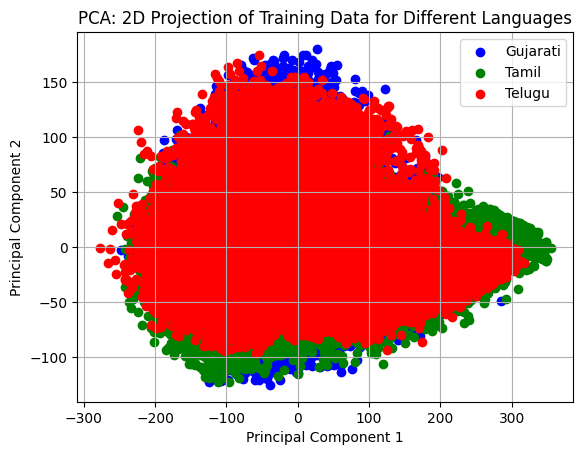

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Read training data from file 'Train.csv' and extract columns 1 to 13 exclusive for each language
gujarati_train_df = pd.read_csv('/kaggle/input/language-csv/kaggle/working/Gujrati-Train.csv', usecols=range(1, 40))
tamil_train_df = pd.read_csv('/kaggle/input/language-csv/kaggle/working/Tamil-Train.csv', usecols=range(1, 40))
telugu_train_df = pd.read_csv('/kaggle/input/language-csv/kaggle/working/Telugu-Train.csv', usecols=range(1, 40))

# Combine all training dataframes
combined_train_df = pd.concat([gujarati_train_df, tamil_train_df, telugu_train_df], ignore_index=True)

# Define colors for each language
colors = {'Gujarati': 'blue', 'Tamil': 'green', 'Telugu': 'red'}

# Create a dictionary to map language labels to color
language_map = {'Gujarati': gujarati_train_df, 'Tamil': tamil_train_df, 'Telugu': telugu_train_df}

# Create a list to store PCA-transformed data for each language
train_pca_list = []

# Perform PCA for each language
for language, df in language_map.items():
    pca = PCA(n_components=2)
    train_pca = pca.fit_transform(df)
    train_pca_list.append(train_pca)
    
    # Plot PCA-transformed data
    plt.scatter(train_pca[:, 0], train_pca[:, 1], label=language, color=colors[language])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: 2D Projection of Training Data for Different Languages')
plt.legend()
plt.grid(True)
plt.show()


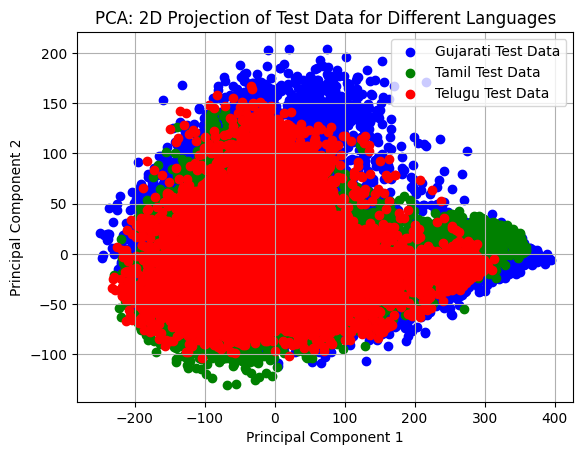

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Read test data from file 'Test.csv' and extract columns 1 to 13 exclusive for each language
gujarati_test_df = pd.read_csv('/kaggle/input/language-csv/kaggle/working/Gujrati-Test.csv', usecols=range(1, 40))
tamil_test_df = pd.read_csv('/kaggle/input/language-csv/kaggle/working/Tamil-Test.csv', usecols=range(1, 40))
telugu_test_df = pd.read_csv('/kaggle/input/language-csv/kaggle/working/Telugu-Test.csv', usecols=range(1, 40))

# Combine all test dataframes
combined_test_df = pd.concat([gujarati_test_df, tamil_test_df, telugu_test_df], ignore_index=True)

# Define colors for each language
colors = {'Gujarati': 'blue', 'Tamil': 'green', 'Telugu': 'red'}

# Create a dictionary to map language labels to color
language_map = {'Gujarati': gujarati_test_df, 'Tamil': tamil_test_df, 'Telugu': telugu_test_df}

# Create a list to store PCA-transformed data for each language
test_pca_list = []

# Perform PCA for each language
for language, df in language_map.items():
    pca = PCA(n_components=2)
    test_pca = pca.fit_transform(df)
    test_pca_list.append(test_pca)
    
    # Plot PCA-transformed data
    plt.scatter(test_pca[:, 0], test_pca[:, 1], label=f'{language} Test Data', color=colors[language])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: 2D Projection of Test Data for Different Languages')
plt.legend()
plt.grid(True)
plt.show()


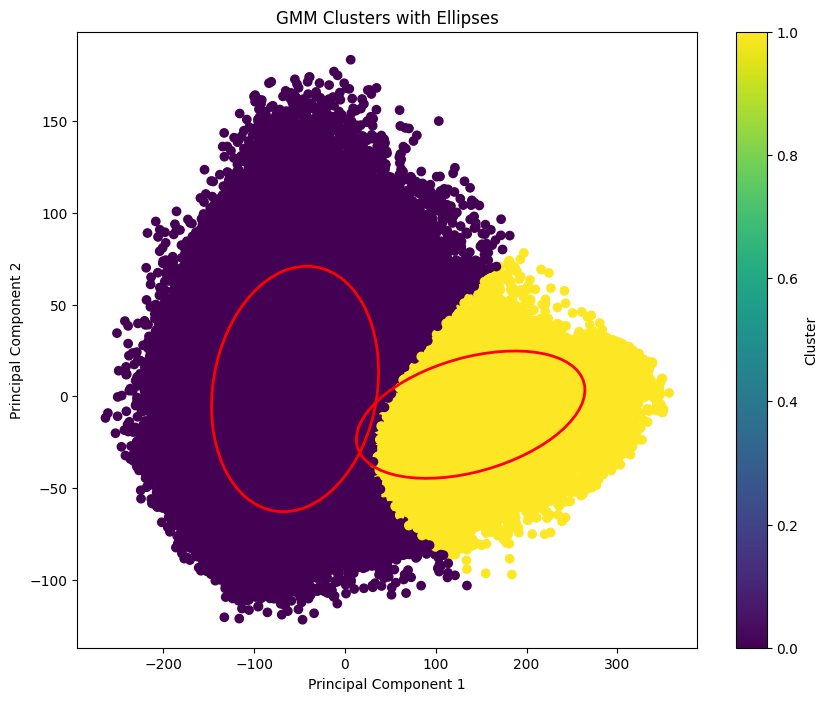

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

# Read training data for each language
gujarati_train_df = pd.read_csv('/kaggle/input/language-csv/kaggle/working/Gujrati-Train.csv', usecols=range(1, 40))
tamil_train_df = pd.read_csv('/kaggle/input/language-csv/kaggle/working/Tamil-Train.csv', usecols=range(1, 40))
telugu_train_df = pd.read_csv('/kaggle/input/language-csv/kaggle/working/Telugu-Train.csv', usecols=range(1, 40))

# Combine all training dataframes
combined_train_df = pd.concat([gujarati_train_df, tamil_train_df, telugu_train_df], ignore_index=True)

# Perform PCA on the combined training data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(combined_train_df)

# GMM clustering for combined training data
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(X_pca)
labels = gmm.predict(X_pca)
centers = gmm.means_
covariances = gmm.covariances_

# Plot clusters and ellipses
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')

for i in range(len(centers)):
    # Plot ellipse for each component
    cov_matrix = covariances[i]
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))
    width, height = 2 * np.sqrt(2 * eigenvalues)
    ellipse = Ellipse(xy=centers[i], width=width, height=height, angle=angle, edgecolor='r', lw=2, fill=False)
    plt.gca().add_patch(ellipse)

plt.title('GMM Clusters with Ellipses')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()


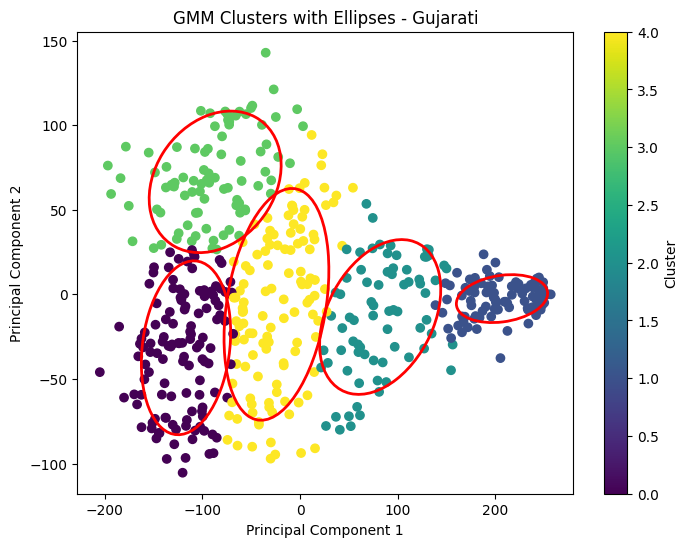

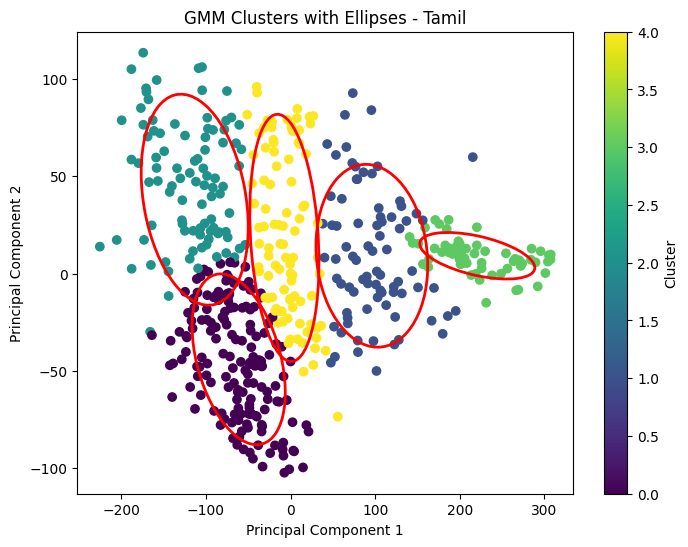

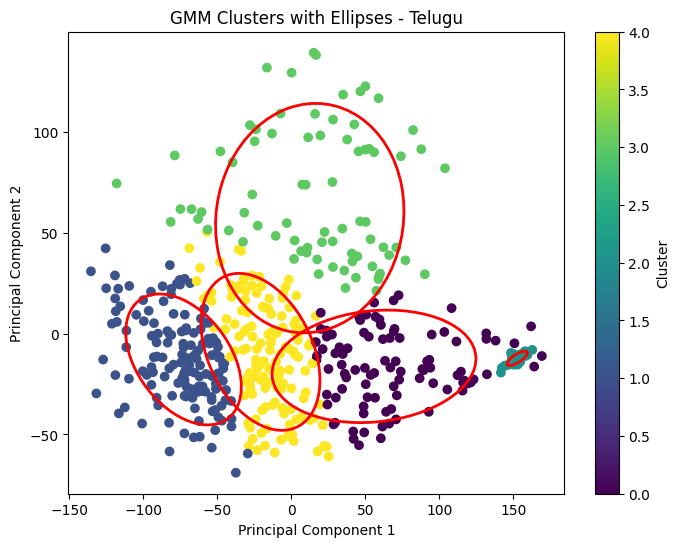

In [5]:
# Read training data for each language and reduce to 500 rows
gujarati_train_df = pd.read_csv('/kaggle/input/language-csv/kaggle/working/Gujrati-Train.csv', usecols=range(1, 40)).head(500)
tamil_train_df = pd.read_csv('/kaggle/input/language-csv/kaggle/working/Tamil-Train.csv', usecols=range(1, 40)).head(500)
telugu_train_df = pd.read_csv('/kaggle/input/language-csv/kaggle/working/Telugu-Train.csv', usecols=range(1, 40)).head(500)

# Perform PCA separately for each language
pca_gujarati = PCA(n_components=2)
X_pca_gujarati = pca_gujarati.fit_transform(gujarati_train_df)

pca_tamil = PCA(n_components=2)
X_pca_tamil = pca_tamil.fit_transform(tamil_train_df)

pca_telugu = PCA(n_components=2)
X_pca_telugu = pca_telugu.fit_transform(telugu_train_df)

# GMM clustering for Gujarati data
gmm_gujarati = GaussianMixture(n_components=5, random_state=0)
gmm_gujarati.fit(X_pca_gujarati)
labels_gujarati = gmm_gujarati.predict(X_pca_gujarati)
centers_gujarati = gmm_gujarati.means_
covariances_gujarati = gmm_gujarati.covariances_

# GMM clustering for Tamil data
gmm_tamil = GaussianMixture(n_components=5, random_state=0)
gmm_tamil.fit(X_pca_tamil)
labels_tamil = gmm_tamil.predict(X_pca_tamil)
centers_tamil = gmm_tamil.means_
covariances_tamil = gmm_tamil.covariances_

# GMM clustering for Telugu data
gmm_telugu = GaussianMixture(n_components=5, random_state=0)
gmm_telugu.fit(X_pca_telugu)
labels_telugu = gmm_telugu.predict(X_pca_telugu)
centers_telugu = gmm_telugu.means_
covariances_telugu = gmm_telugu.covariances_

# Plot clusters and ellipses for Gujarati data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_gujarati[:, 0], X_pca_gujarati[:, 1], c=labels_gujarati, cmap='viridis')
for i in range(len(centers_gujarati)):
    # Plot ellipse for each component
    cov_matrix = covariances_gujarati[i]
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))
    width, height = 2 * np.sqrt(2 * eigenvalues)
    ellipse = Ellipse(xy=centers_gujarati[i], width=width, height=height, angle=angle, edgecolor='r', lw=2, fill=False)
    plt.gca().add_patch(ellipse)
plt.title('GMM Clusters with Ellipses - Gujarati')
plt.colorbar(label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Plot clusters and ellipses for Tamil data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_tamil[:, 0], X_pca_tamil[:, 1], c=labels_tamil, cmap='viridis')
for i in range(len(centers_tamil)):
    # Plot ellipse for each component
    cov_matrix = covariances_tamil[i]
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))
    width, height = 2 * np.sqrt(2 * eigenvalues)
    ellipse = Ellipse(xy=centers_tamil[i], width=width, height=height, angle=angle, edgecolor='r', lw=2, fill=False)
    plt.gca().add_patch(ellipse)
plt.title('GMM Clusters with Ellipses - Tamil')
plt.colorbar(label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Plot clusters and ellipses for Telugu data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_telugu[:, 0], X_pca_telugu[:, 1], c=labels_telugu, cmap='viridis')
for i in range(len(centers_telugu)):
    # Plot ellipse for each component
    cov_matrix = covariances_telugu[i]
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))
    width, height = 2 * np.sqrt(2 * eigenvalues)
    ellipse = Ellipse(xy=centers_telugu[i], width=width, height=height, angle=angle, edgecolor='r', lw=2, fill=False)
    plt.gca().add_patch(ellipse)
plt.title('GMM Clusters with Ellipses - Telugu')
plt.colorbar(label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


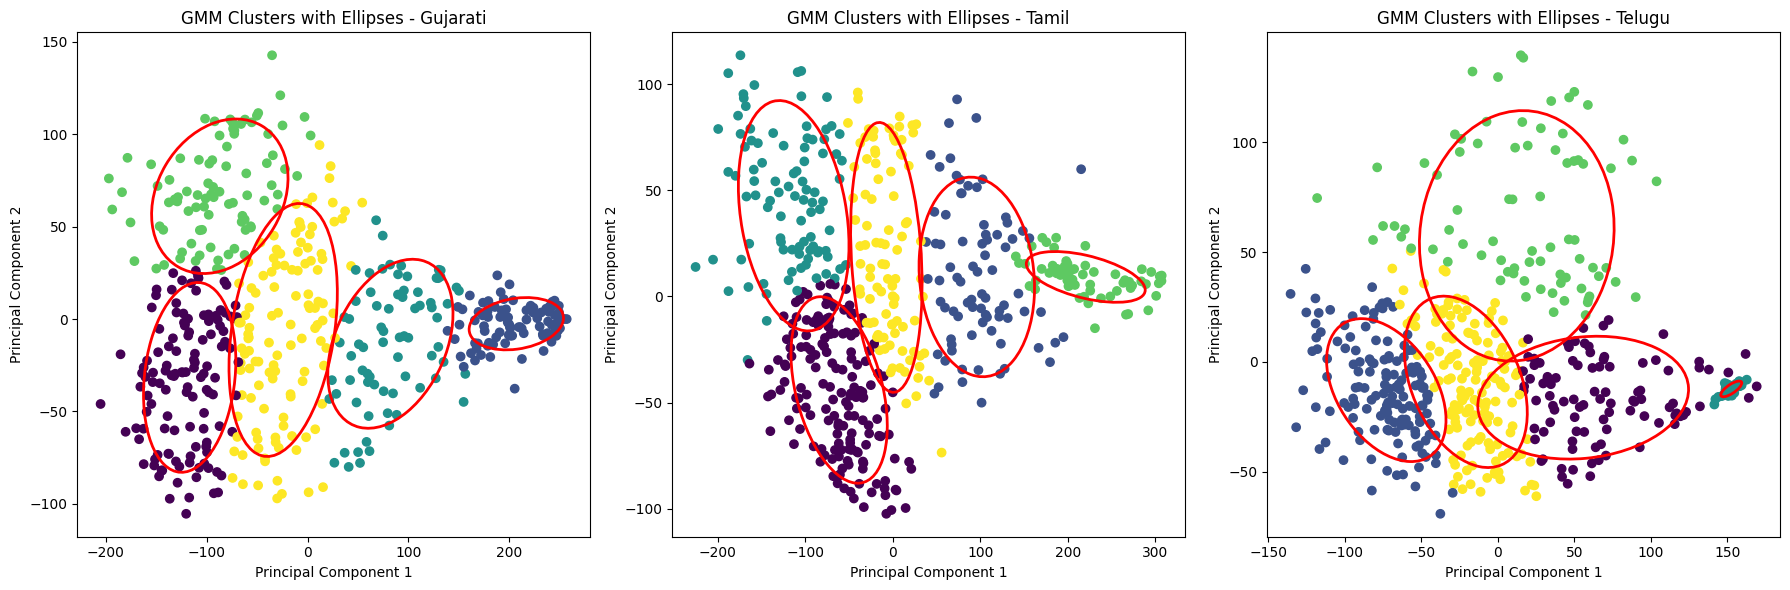

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

# Read training data for each language and reduce to 500 rows
gujarati_train_df = pd.read_csv('/kaggle/input/language-csv/kaggle/working/Gujrati-Train.csv', usecols=range(1, 40)).head(500)
tamil_train_df = pd.read_csv('/kaggle/input/language-csv/kaggle/working/Tamil-Train.csv', usecols=range(1, 40)).head(500)
telugu_train_df = pd.read_csv('/kaggle/input/language-csv/kaggle/working/Telugu-Train.csv', usecols=range(1, 40)).head(500)

# Perform PCA separately for each language
pca_gujarati = PCA(n_components=2)
X_pca_gujarati = pca_gujarati.fit_transform(gujarati_train_df)

pca_tamil = PCA(n_components=2)
X_pca_tamil = pca_tamil.fit_transform(tamil_train_df)

pca_telugu = PCA(n_components=2)
X_pca_telugu = pca_telugu.fit_transform(telugu_train_df)

# GMM clustering for Gujarati data
gmm_gujarati = GaussianMixture(n_components=5, random_state=0)
gmm_gujarati.fit(X_pca_gujarati)
labels_gujarati = gmm_gujarati.predict(X_pca_gujarati)
centers_gujarati = gmm_gujarati.means_
covariances_gujarati = gmm_gujarati.covariances_

# GMM clustering for Tamil data
gmm_tamil = GaussianMixture(n_components=5, random_state=0)
gmm_tamil.fit(X_pca_tamil)
labels_tamil = gmm_tamil.predict(X_pca_tamil)
centers_tamil = gmm_tamil.means_
covariances_tamil = gmm_tamil.covariances_

# GMM clustering for Telugu data
gmm_telugu = GaussianMixture(n_components=5, random_state=0)
gmm_telugu.fit(X_pca_telugu)
labels_telugu = gmm_telugu.predict(X_pca_telugu)
centers_telugu = gmm_telugu.means_
covariances_telugu = gmm_telugu.covariances_

# Plot all three plots side by side on a single line
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot clusters and ellipses for Gujarati data
axs[0].scatter(X_pca_gujarati[:, 0], X_pca_gujarati[:, 1], c=labels_gujarati, cmap='viridis')
for i in range(len(centers_gujarati)):
    cov_matrix = covariances_gujarati[i]
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))
    width, height = 2 * np.sqrt(2 * eigenvalues)
    ellipse = Ellipse(xy=centers_gujarati[i], width=width, height=height, angle=angle, edgecolor='r', lw=2, fill=False)
    axs[0].add_patch(ellipse)
axs[0].set_title('GMM Clusters with Ellipses - Gujarati')
axs[0].set_xlabel('Principal Component 1')
axs[0].set_ylabel('Principal Component 2')

# Plot clusters and ellipses for Tamil data
axs[1].scatter(X_pca_tamil[:, 0], X_pca_tamil[:, 1], c=labels_tamil, cmap='viridis')
for i in range(len(centers_tamil)):
    cov_matrix = covariances_tamil[i]
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))
    width, height = 2 * np.sqrt(2 * eigenvalues)
    ellipse = Ellipse(xy=centers_tamil[i], width=width, height=height, angle=angle, edgecolor='r', lw=2, fill=False)
    axs[1].add_patch(ellipse)
axs[1].set_title('GMM Clusters with Ellipses - Tamil')
axs[1].set_xlabel('Principal Component 1')
axs[1].set_ylabel('Principal Component 2')

# Plot clusters and ellipses for Telugu data
axs[2].scatter(X_pca_telugu[:, 0], X_pca_telugu[:, 1], c=labels_telugu, cmap='viridis')
for i in range(len(centers_telugu)):
    cov_matrix = covariances_telugu[i]
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))
    width, height = 2 * np.sqrt(2 * eigenvalues)
    ellipse = Ellipse(xy=centers_telugu[i], width=width, height=height, angle=angle, edgecolor='r', lw=2, fill=False)
    axs[2].add_patch(ellipse)
axs[2].set_title('GMM Clusters with Ellipses - Telugu')
axs[2].set_xlabel('Principal Component 1')
axs[2].set_ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


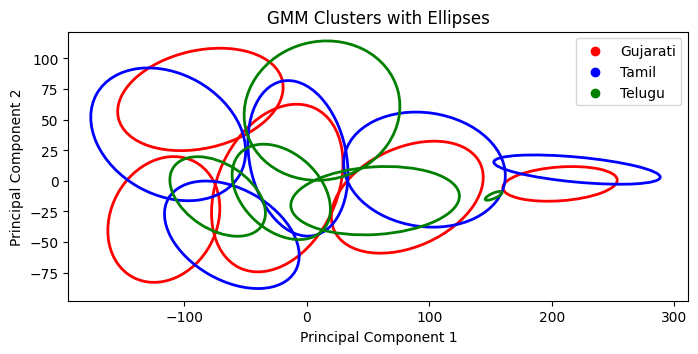

In [8]:
# Plot clusters and ellipses for all languages on a single plot
plt.figure(figsize=(8, 6))

# Plot Gujarati ellipse
for i in range(len(centers_gujarati)):
    # Plot ellipse for Gujarati data
    cov_matrix = covariances_gujarati[i]
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))
    width, height = 2 * np.sqrt(2 * eigenvalues)
    ellipse = Ellipse(xy=centers_gujarati[i], width=width, height=height, angle=angle, edgecolor='r', lw=2, fill=False)
    plt.gca().add_patch(ellipse)

# Plot Tamil ellipse
for i in range(len(centers_tamil)):
    # Plot ellipse for Tamil data
    cov_matrix = covariances_tamil[i]
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))
    width, height = 2 * np.sqrt(2 * eigenvalues)
    ellipse = Ellipse(xy=centers_tamil[i], width=width, height=height, angle=angle, edgecolor='b', lw=2, fill=False)
    plt.gca().add_patch(ellipse)

# Plot Telugu ellipse
for i in range(len(centers_telugu)):
    # Plot ellipse for Telugu data
    cov_matrix = covariances_telugu[i]
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))
    width, height = 2 * np.sqrt(2 * eigenvalues)
    ellipse = Ellipse(xy=centers_telugu[i], width=width, height=height, angle=angle, edgecolor='g', lw=2, fill=False)
    plt.gca().add_patch(ellipse)

# Plot labels
plt.scatter([], [], c='r', label='Gujarati')
plt.scatter([], [], c='b', label='Tamil')
plt.scatter([], [], c='g', label='Telugu')
plt.legend()

# Set labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('GMM Clusters with Ellipses')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()


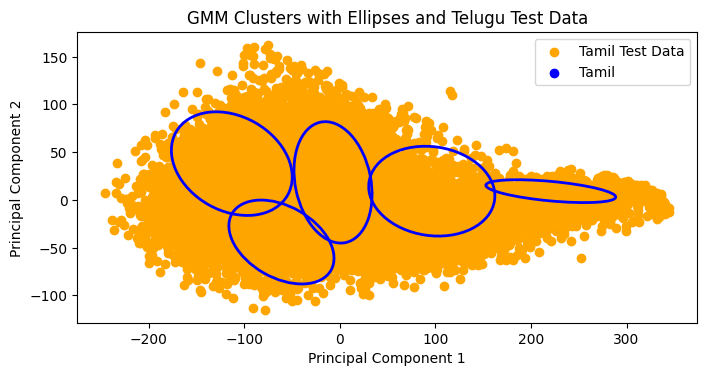

In [9]:
# Perform PCA on the Gujarati test data
gujarati_test_df = pd.read_csv('/kaggle/input/language-csv/kaggle/working/Tamil-Test.csv', usecols=range(1, 40))
X_test_pca_gujarati = pca_gujarati.transform(gujarati_test_df)

# Plot clusters and ellipses for all languages on a single plot
plt.figure(figsize=(8, 6))

# Plot Gujarati test data points
plt.scatter(X_test_pca_gujarati[:, 0], X_test_pca_gujarati[:, 1], color='orange', label='Tamil Test Data')

# Plot Gujarati ellipse
# for i in range(len(centers_gujarati)):
#     # Plot ellipse for Gujarati data
#     cov_matrix = covariances_gujarati[i]
#     eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
#     angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))
#     width, height = 2 * np.sqrt(2 * eigenvalues)
#     ellipse = Ellipse(xy=centers_gujarati[i], width=width, height=height, angle=angle, edgecolor='r', lw=2, fill=False)
#     plt.gca().add_patch(ellipse)

# # Plot Tamil ellipse
for i in range(len(centers_tamil)):
    # Plot ellipse for Tamil data
    cov_matrix = covariances_tamil[i]
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))
    width, height = 2 * np.sqrt(2 * eigenvalues)
    ellipse = Ellipse(xy=centers_tamil[i], width=width, height=height, angle=angle, edgecolor='b', lw=2, fill=False)
    plt.gca().add_patch(ellipse)

# Plot Telugu ellipse
# for i in range(len(centers_telugu)):
#     # Plot ellipse for Telugu data
#     cov_matrix = covariances_telugu[i]
#     eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
#     angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))
#     width, height = 2 * np.sqrt(2 * eigenvalues)
#     ellipse = Ellipse(xy=centers_telugu[i], width=width, height=height, angle=angle, edgecolor='g', lw=2, fill=False)
#     plt.gca().add_patch(ellipse)

# Plot labels
# plt.scatter([], [], c='r', label='Gujarati')
plt.scatter([], [], c='b', label='Tamil')
# plt.scatter([], [], c='g', label='Telugu')
plt.legend()

# Set labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('GMM Clusters with Ellipses and Telugu Test Data')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()


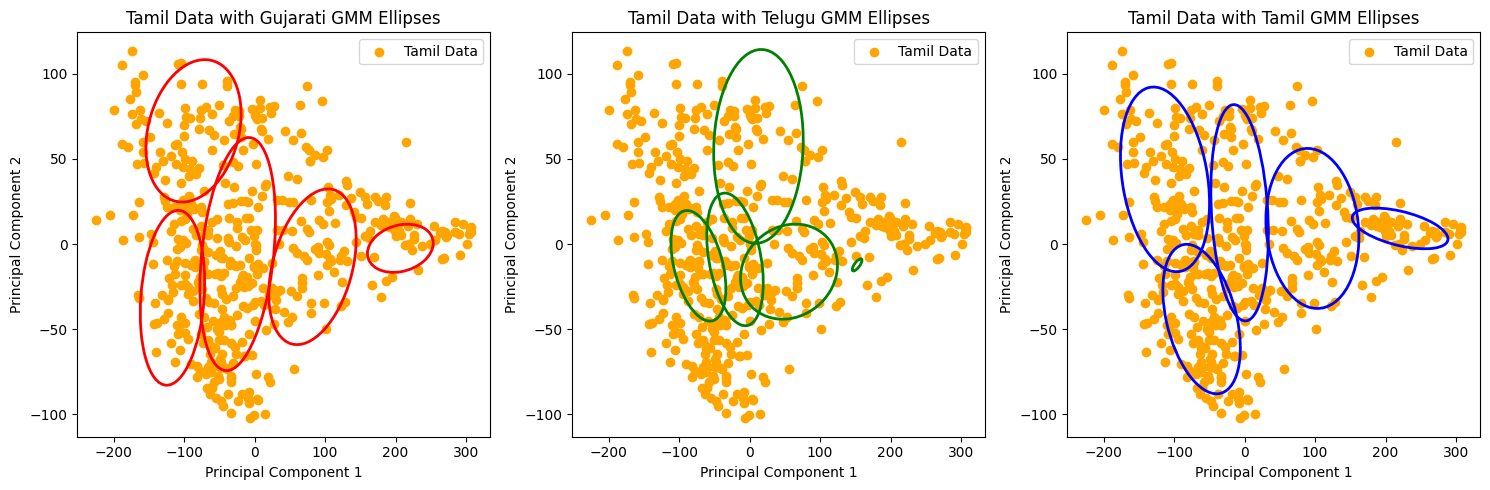

In [10]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot clusters and ellipses for Tamil data with ellipses of different languages
for ax, (language, centers, covariances, color) in zip(axes, [('Gujarati', centers_gujarati, covariances_gujarati, 'r'),
                                                               ('Telugu', centers_telugu, covariances_telugu, 'green'),
                                                               ('Tamil', centers_tamil, covariances_tamil, 'b')]):
    # Plot Tamil data points
    ax.scatter(X_pca_tamil[:, 0], X_pca_tamil[:, 1], color='orange', label='Tamil Data')

    # Plot ellipses for different languages
    for i in range(len(centers)):
        # Plot ellipse for other languages
        cov_matrix = covariances[i]
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
        angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))
        width, height = 2 * np.sqrt(2 * eigenvalues)
        ellipse = Ellipse(xy=centers[i], width=width, height=height, angle=angle, edgecolor=color, lw=2, fill=False)
        ax.add_patch(ellipse)

    # Set labels and title
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_title('Tamil Data with {} GMM Ellipses'.format(language))
    ax.legend()

plt.tight_layout()
plt.show()


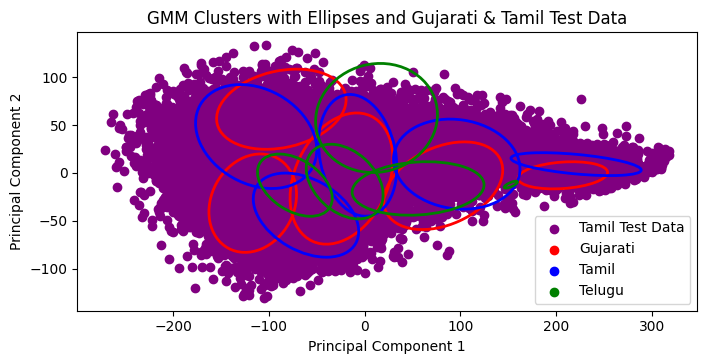

In [11]:
# Perform PCA on the Tamil test data
tamil_test_df = pd.read_csv('/kaggle/input/language-csv/kaggle/working/Tamil-Test.csv', usecols=range(1, 40))
X_test_pca_tamil = pca_tamil.transform(tamil_test_df)

# Plot clusters and ellipses for all languages on a single plot
plt.figure(figsize=(8, 6))

# Plot Gujarati test data points
# plt.scatter(X_test_pca_gujarati[:, 0], X_test_pca_gujarati[:, 1], color='orange', label='Gujarati Test Data')

# Plot Tamil test data points
plt.scatter(X_test_pca_tamil[:, 0], X_test_pca_tamil[:, 1], color='purple', label='Tamil Test Data')

# Plot Gujarati ellipse
for i in range(len(centers_gujarati)):
    # Plot ellipse for Gujarati data
    cov_matrix = covariances_gujarati[i]
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))
    width, height = 2 * np.sqrt(2 * eigenvalues)
    ellipse = Ellipse(xy=centers_gujarati[i], width=width, height=height, angle=angle, edgecolor='r', lw=2, fill=False)
    plt.gca().add_patch(ellipse)

# Plot Tamil ellipse
for i in range(len(centers_tamil)):
    # Plot ellipse for Tamil data
    cov_matrix = covariances_tamil[i]
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))
    width, height = 2 * np.sqrt(2 * eigenvalues)
    ellipse = Ellipse(xy=centers_tamil[i], width=width, height=height, angle=angle, edgecolor='b', lw=2, fill=False)
    plt.gca().add_patch(ellipse)

# Plot Telugu ellipse
for i in range(len(centers_telugu)):
    # Plot ellipse for Telugu data
    cov_matrix = covariances_telugu[i]
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))
    width, height = 2 * np.sqrt(2 * eigenvalues)
    ellipse = Ellipse(xy=centers_telugu[i], width=width, height=height, angle=angle, edgecolor='g', lw=2, fill=False)
    plt.gca().add_patch(ellipse)

# Plot labels
plt.scatter([], [], c='r', label='Gujarati')
plt.scatter([], [], c='b', label='Tamil')
plt.scatter([], [], c='g', label='Telugu')
plt.legend()

# Set labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('GMM Clusters with Ellipses and Gujarati & Tamil Test Data')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()


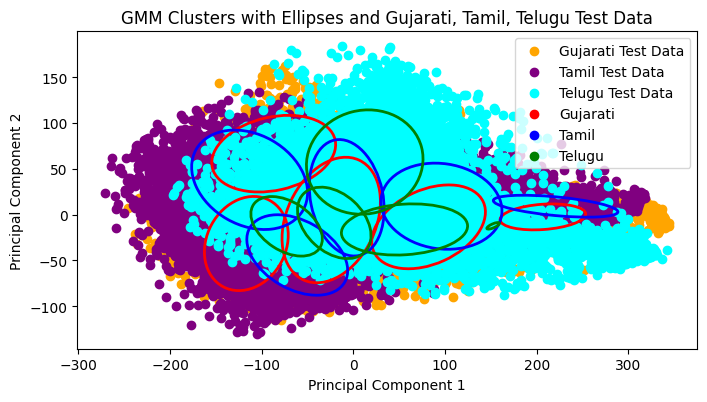

In [12]:
# Perform PCA on the Telugu test data
telugu_test_df = pd.read_csv('/kaggle/input/language-csv/kaggle/working/Telugu-Test.csv', usecols=range(1, 40))
X_test_pca_telugu = pca_telugu.transform(telugu_test_df)

# Plot clusters and ellipses for all languages on a single plot
plt.figure(figsize=(8, 6))

# Plot Gujarati test data points
plt.scatter(X_test_pca_gujarati[:, 0], X_test_pca_gujarati[:, 1], color='orange', label='Gujarati Test Data')

# Plot Tamil test data points
plt.scatter(X_test_pca_tamil[:, 0], X_test_pca_tamil[:, 1], color='purple', label='Tamil Test Data')

# Plot Telugu test data points
plt.scatter(X_test_pca_telugu[:, 0], X_test_pca_telugu[:, 1], color='cyan', label='Telugu Test Data')

# Plot Gujarati ellipse
for i in range(len(centers_gujarati)):
    # Plot ellipse for Gujarati data
    cov_matrix = covariances_gujarati[i]
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))
    width, height = 2 * np.sqrt(2 * eigenvalues)
    ellipse = Ellipse(xy=centers_gujarati[i], width=width, height=height, angle=angle, edgecolor='r', lw=2, fill=False)
    plt.gca().add_patch(ellipse)

# Plot Tamil ellipse
for i in range(len(centers_tamil)):
    # Plot ellipse for Tamil data
    cov_matrix = covariances_tamil[i]
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))
    width, height = 2 * np.sqrt(2 * eigenvalues)
    ellipse = Ellipse(xy=centers_tamil[i], width=width, height=height, angle=angle, edgecolor='b', lw=2, fill=False)
    plt.gca().add_patch(ellipse)

# Plot Telugu ellipse
for i in range(len(centers_telugu)):
    # Plot ellipse for Telugu data
    cov_matrix = covariances_telugu[i]
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    angle = np.degrees(np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]))
    width, height = 2 * np.sqrt(2 * eigenvalues)
    ellipse = Ellipse(xy=centers_telugu[i], width=width, height=height, angle=angle, edgecolor='g', lw=2, fill=False)
    plt.gca().add_patch(ellipse)

# Plot labels
plt.scatter([], [], c='r', label='Gujarati')
plt.scatter([], [], c='b', label='Tamil')
plt.scatter([], [], c='g', label='Telugu')
plt.legend()

# Set labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('GMM Clusters with Ellipses and Gujarati, Tamil, Telugu Test Data')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()


In [13]:
# Read test data for all languages
gujarati_test_df = pd.read_csv('/kaggle/input/language-csv/kaggle/working/Gujrati-Train.csv', usecols=range(1, 40)).sample(100)
tamil_test_df = pd.read_csv('/kaggle/input/language-csv/kaggle/working/Tamil-Train.csv', usecols=range(1, 40)).sample(100)
telugu_test_df = pd.read_csv('/kaggle/input/language-csv/kaggle/working/Telugu-Train.csv', usecols=range(1, 40)).sample(100)

# Transform test data using PCA
X_test_pca_gujarati = pca_gujarati.transform(gujarati_test_df)
X_test_pca_tamil = pca_tamil.transform(tamil_test_df)
X_test_pca_telugu = pca_telugu.transform(telugu_test_df)

# Calculate likelihoods of test data belonging to clusters of each language
likelihood_gujarati = gmm_gujarati.score_samples(X_test_pca_gujarati)
likelihood_tamil = gmm_tamil.score_samples(X_test_pca_tamil)
likelihood_telugu = gmm_telugu.score_samples(X_test_pca_telugu)

# Get the cluster with maximum probability for each test sample# Get the cluster with maximum probability for each test sample
predicted_cluster_gujarati = np.argmax(likelihood_gujarati)
predicted_cluster_tamil = np.argmax(likelihood_tamil)
predicted_cluster_telugu = np.argmax(likelihood_telugu)


# Print likelihoods and predicted clusters for Gujarati test data
# print("Likelihood of Gujarati test samples belonging to Gujarati clusters:", likelihood_gujarati)
print("Predicted cluster for Gujarati test samples:", predicted_cluster_gujarati)

# Print likelihoods and predicted clusters for Tamil test data
# print("Likelihood of Tamil test samples belonging to Tamil clusters:", likelihood_tamil)
print("Predicted cluster for Tamil test samples:", predicted_cluster_tamil)

# Print likelihoods and predicted clusters for Telugu test data
# print("Likelihood of Telugu test samples belonging to Telugu clusters:", likelihood_telugu)
print("Predicted cluster for Telugu test samples:", predicted_cluster_telugu)


Predicted cluster for Gujarati test samples: 38
Predicted cluster for Tamil test samples: 85
Predicted cluster for Telugu test samples: 76


In [14]:
# Read test data for each language
gujarati_test_df = pd.read_csv('/kaggle/input/language-csv/kaggle/working/Gujrati-Train.csv', usecols=range(1, 40)).sample(100)
tamil_test_df = pd.read_csv('/kaggle/input/language-csv/kaggle/working/Tamil-Train.csv', usecols=range(1, 40)).sample(100)
telugu_test_df = pd.read_csv('/kaggle/input/language-csv/kaggle/working/Telugu-Train.csv', usecols=range(1, 40)).sample(100)

# Transform test data using PCA
X_test_pca_gujarati = pca_gujarati.transform(gujarati_test_df)
X_test_pca_tamil = pca_tamil.transform(tamil_test_df)
X_test_pca_telugu = pca_telugu.transform(telugu_test_df)

# Calculate log likelihoods of test data under each language's GMM

log_likelihood_gujarati = gmm_gujarati.score_samples(X_test_pca_gujarati)
log_likelihood_tamil = gmm_tamil.score_samples(X_test_pca_tamil)
log_likelihood_telugu = gmm_telugu.score_samples(X_test_pca_telugu)

# Find the index of the GMM with the highest likelihood for each test data point
predicted_language_gujarati = np.argmax(log_likelihood_gujarati)
predicted_language_tamil = np.argmax(log_likelihood_tamil)
predicted_language_telugu = np.argmax(log_likelihood_telugu)

# Print the results
print("Predicted language for Gujarati test data:", predicted_language_gujarati)
print("Predicted language for Tamil test data:", predicted_language_tamil)
print("Predicted language for Telugu test data:", predicted_language_telugu)

# Calculate the difference between log likelihoods for each test data point

# For Gujarati test data
gujarati_bias = log_likelihood_gujarati - np.maximum(log_likelihood_tamil, log_likelihood_telugu)
# For Tamil test data
tamil_bias = log_likelihood_tamil - np.maximum(log_likelihood_gujarati, log_likelihood_telugu)
# For Telugu test data
telugu_bias = log_likelihood_telugu - np.maximum(log_likelihood_gujarati, log_likelihood_tamil)

# Find the index of the minimum bias for each test data point
min_bias_index_gujarati = np.argmin(np.abs(gujarati_bias))
min_bias_index_tamil = np.argmin(np.abs(tamil_bias))
min_bias_index_telugu = np.argmin(np.abs(telugu_bias))

# Print the results
print("Minimum bias index for Gujarati test data:", min_bias_index_gujarati)
print("Minimum bias index for Tamil test data:", min_bias_index_tamil)
print("Minimum bias index for Telugu test data:", min_bias_index_telugu)


Predicted language for Gujarati test data: 11
Predicted language for Tamil test data: 60
Predicted language for Telugu test data: 83
Minimum bias index for Gujarati test data: 12
Minimum bias index for Tamil test data: 19
Minimum bias index for Telugu test data: 19


In [15]:
# Calculate the bias of each test data point with respect to Tamil and Telugu GMMs for Gujarati test data
gujarati_bias_tamil = log_likelihood_gujarati - log_likelihood_tamil
gujarati_bias_telugu = log_likelihood_gujarati - log_likelihood_telugu

# Calculate the bias of each test data point with respect to Gujarati and Telugu GMMs for Tamil test data
tamil_bias_gujarati = log_likelihood_tamil - log_likelihood_gujarati
tamil_bias_telugu = log_likelihood_tamil - log_likelihood_telugu

# Calculate the bias of each test data point with respect to Gujarati and Tamil GMMs for Telugu test data
telugu_bias_gujarati = log_likelihood_telugu - log_likelihood_gujarati
telugu_bias_tamil = log_likelihood_telugu - log_likelihood_tamil

# Find the index of the minimum bias for each test data point for each language
min_bias_index_gujarati_tamil = np.argmin(np.abs(gujarati_bias_tamil))
min_bias_index_gujarati_telugu = np.argmin(np.abs(gujarati_bias_telugu))
min_bias_index_tamil_gujarati = np.argmin(np.abs(tamil_bias_gujarati))
min_bias_index_tamil_telugu = np.argmin(np.abs(tamil_bias_telugu))
min_bias_index_telugu_gujarati = np.argmin(np.abs(telugu_bias_gujarati))
min_bias_index_telugu_tamil = np.argmin(np.abs(telugu_bias_tamil))

# Print the results
print("Minimum bias index for Gujarati test data with Tamil GMM:", min_bias_index_gujarati_tamil)
print("Minimum bias index for Gujarati test data with Telugu GMM:", min_bias_index_gujarati_telugu)
print("Minimum bias index for Tamil test data with Gujarati GMM:", min_bias_index_tamil_gujarati)
print("Minimum bias index for Tamil test data with Telugu GMM:", min_bias_index_tamil_telugu)
print("Minimum bias index for Telugu test data with Gujarati GMM:", min_bias_index_telugu_gujarati)
print("Minimum bias index for Telugu test data with Tamil GMM:", min_bias_index_telugu_tamil)


Minimum bias index for Gujarati test data with Tamil GMM: 90
Minimum bias index for Gujarati test data with Telugu GMM: 89
Minimum bias index for Tamil test data with Gujarati GMM: 90
Minimum bias index for Tamil test data with Telugu GMM: 19
Minimum bias index for Telugu test data with Gujarati GMM: 89
Minimum bias index for Telugu test data with Tamil GMM: 19


In [16]:
log_likelihood_gujrati_gujrati = gmm_gujarati.score_samples(X_test_pca_gujarati)
log_likelihood_gujrati_tamil = gmm_tamil.score_samples(X_test_pca_gujarati)
log_likelihood_gujrati_telugu = gmm_telugu.score_samples(X_test_pca_gujarati)

min_bias_index_gujrati_telugu = np.argmin(np.abs(log_likelihood_gujrati_telugu))
min_bias_index_gujrati_telugu = np.argmin(np.abs(log_likelihood_gujrati_tamil))
min_bias_index_gujrati_gujrati = np.argmin(np.abs(log_likelihood_gujrati_gujrati))
print(min_bias_index_gujrati_telugu)
print(min_bias_index_gujrati_telugu)
print(min_bias_index_gujrati_gujrati)
print(log_likelihood_gujrati_telugu)
print(log_likelihood_gujrati_tamil)
print(log_likelihood_gujrati_gujrati)

35
35
11
[ -9.63503437 -11.89770267 -10.81694469 -12.33886696 -10.22705928
 -11.51777825 -11.31929014 -18.29124216 -11.01332528 -14.18938168
 -11.84275862 -14.93602723  -9.44670897 -12.91601888 -12.73753853
 -11.48566984 -10.2271778  -11.573568   -16.41911033 -14.01594992
 -15.33152552 -12.7847727  -10.28261469 -15.82199873 -10.35879213
 -11.85505922 -10.58049285  -9.83235058 -11.7902959  -16.2124182
 -10.27009577 -18.2411031  -12.11425761  -9.79938964 -18.57380436
 -17.09986886 -13.98877552 -10.4416086   -9.84062283 -13.89934876
 -17.54272997 -10.78061538 -10.50453804 -11.64648431 -19.62374535
  -9.47473667 -19.54130967 -14.6236031  -17.50732257  -9.54070102
  -9.56637361 -13.68502281 -14.04066423 -12.28864666 -13.68170378
  -9.56727222 -10.3936741  -17.76175107 -10.27591862 -21.56654403
 -14.69496087 -16.13304524 -12.57868923 -15.21595315 -11.18169017
 -23.90359879 -10.53773334 -10.51475811  -9.95584934 -10.07447149
 -11.85873001 -17.54540972 -12.57582353 -12.13067784 -12.96273834
 -